In [75]:
from urllib import request

filenames = ["train-images-idx3-ubyte.gz",
             "train-labels-idx1-ubyte.gz",
             "t10k-images-idx3-ubyte.gz",
             "t10k-labels-idx1-ubyte.gz"]

folder = 'data_fashion_mnist/'
base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
for name in filenames:
    print("Downloading " + name + "...")

    # lưu vào folder data_fashion_mnist
    request.urlretrieve(base_url + name, folder + name)

In [76]:
import numpy as np
import gzip
import os

In [78]:
# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


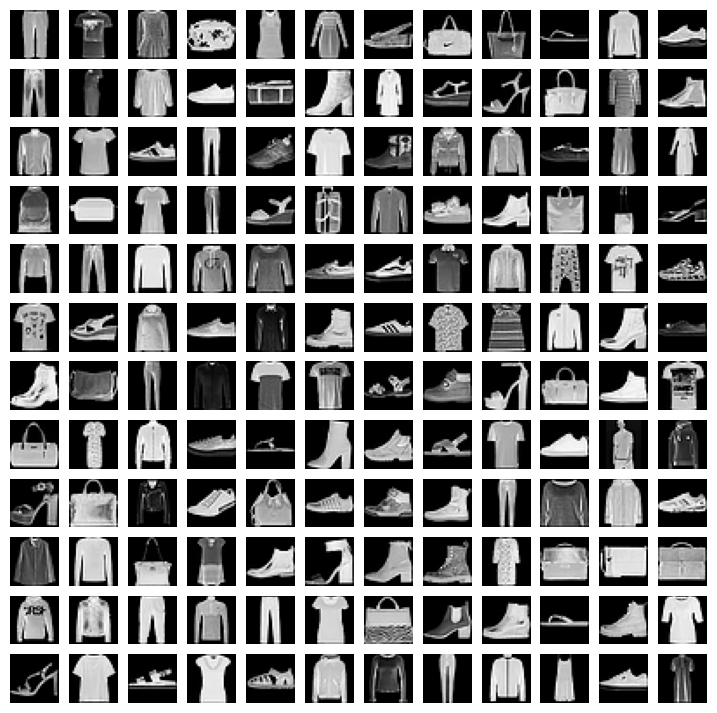

In [82]:
import matplotlib.pyplot as plt 
import numpy as np 

# Tạo danh sách 100 phần tử ngẫu nhiên từ X_train có 60000 phần tử
indices = list(np.random.randint(X_train.shape[0],size=144))

fig =plt.figure(figsize=(9,9))
columns = 12
rows = 12
for i in range(1, columns*rows +1):
    img = X_train[indices[i-1]].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [86]:
from PIL import Image

indices = list(np.random.randint(6000,size=10))
for i in range(10):
    im = Image.fromarray(X_train[indices[i]].reshape(28,28))
    im.save("data_fashion_mnist/images/image_" + str(i) +".png")    

In [91]:
from torchvision.datasets import FashionMNIST
trainset = FashionMNIST(root='data', 
                        train=True, 
                        download=True)

img, label = trainset[0]
print(type(img), label)

100.0%
100.0%
100.0%
100.0%

<class 'PIL.Image.Image'> 9


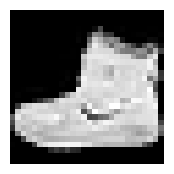

In [92]:
import matplotlib.pyplot as plt

img, _ = trainset[0]

plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray')  
plt.axis('off')  # Hide axis
plt.show()

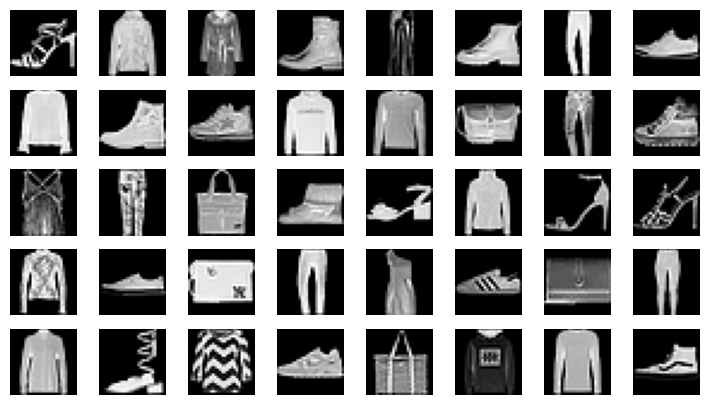

In [93]:
import matplotlib.pyplot as plt 
import numpy as np 

# Tạo indices cho 64 phần tử ngẫu nhiên
indices = list(np.random.randint(60000, size=40))

fig =plt.figure(figsize=(9, 5))
columns = 8
rows = 5
for i in range(1, columns*rows +1):
    img, label = trainset[indices[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [94]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='data', train=True, 
                        download=True, transform=transform)

img, label = trainset[0]
print(type(img), label)
print(img.shape)

<class 'torch.Tensor'> 9
torch.Size([1, 28, 28])


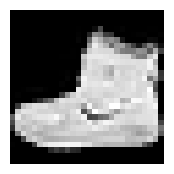

In [95]:
import matplotlib.pyplot as plt

img, _ = trainset[0]
np_img = img.numpy()
np_img = np.transpose(np_img, (1, 2, 0))

plt.figure(figsize=(2,2))
plt.imshow(np_img, cmap='gray')
plt.axis('off')  
plt.show()

In [96]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root='data', 
                        train=True, 
                        download=True, 
                        transform=transform)

trainloader = DataLoader(trainset, 
                         batch_size=3500, 
                         num_workers=2, 
                         shuffle=True)
print(len(trainloader))

18


In [97]:
# batch_size=3500
for i, (inputs, labels) in enumerate(trainloader, 0):
    print(f'Batch index {i} -- {inputs.shape} -- {labels.shape}')

Batch index 0 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 1 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 2 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 3 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 4 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 5 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 6 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 7 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 8 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 9 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 10 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 11 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 12 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 13 -- torch.Size([3500, 1, 28, 28]) -- torch.Size([3500])
Batch index 14 -- torch.Size([

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [99]:
# Load dataset with only the ToTensor transform to compute mean and std
compute_transform = transforms.Compose([transforms.ToTensor()])
dataset = torchvision.datasets.FashionMNIST(root='data', train=True, transform=compute_transform, download=True)
loader = torch.utils.data.DataLoader(dataset, batch_size=1024, shuffle=False, num_workers=10)

mean = 0.0
for images, _ in loader:
    batch_samples = images.size(0)  # Batch size
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
mean = mean / len(loader.dataset)

variance = 0.0
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    variance += ((images - mean.unsqueeze(1))**2).sum([0,2])
std = torch.sqrt(variance / (len(loader.dataset)*28*28))

print(mean, std)

tensor([0.2860]) tensor([0.3530])


In [100]:
# Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])

trainset = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=10, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=10, shuffle=False)

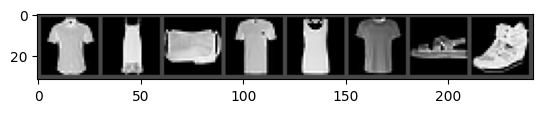

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img*std + mean
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))  # Display 8 images from the batch
    break

In [102]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)
model = model.to(device)

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


In [103]:
# Generating a random tensor
input_tensor = torch.rand(5, 28, 28).to(device)

# Feeding the tensor into the model
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


In [104]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [105]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [106]:
test_loss, test_accuracy = evaluate(model, testloader, criterion)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 2.2952466011047363
test_accuracy: 11.91


In [107]:
# some parameter
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 200

In [108]:
# train
for epoch in range(max_epoch):
    running_loss = 0.0
    running_correct = 0   # to track number of correct predictions
    total = 0             # to track total number of samples

    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Move inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()        

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/200], Loss: 1.6078, Accuracy: 55.40%, Test Loss: 1.1824, Test Accuracy: 68.28%
Epoch [2/200], Loss: 1.0128, Accuracy: 70.64%, Test Loss: 0.9067, Test Accuracy: 71.64%
Epoch [3/200], Loss: 0.8336, Accuracy: 73.64%, Test Loss: 0.7923, Test Accuracy: 73.95%
Epoch [4/200], Loss: 0.7455, Accuracy: 75.52%, Test Loss: 0.7279, Test Accuracy: 75.28%
Epoch [5/200], Loss: 0.6909, Accuracy: 76.84%, Test Loss: 0.6850, Test Accuracy: 76.42%
Epoch [6/200], Loss: 0.6539, Accuracy: 77.83%, Test Loss: 0.6548, Test Accuracy: 77.16%


KeyboardInterrupt: 

In [125]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()
